<a href="https://colab.research.google.com/github/Samuelsilvestre/UFBrasil/blob/master/Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise das Variáveis Socioeconômicas dos Estados da Federação: Correlações e Impactos Regionais

**Indicadores Abrangidos:**
* **PIB e PIB Per Capita:** Riqueza total e distribuição por habitante.
* **MVI (Mortes Violentas Intencionais):** Taxa de criminalidade por 100 mil habitantes.
* **IDEB:** Desempenho educacional nos ciclos fundamental e médio.

>**Bibliotecas python**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

>**Carregando os dados**

In [2]:

IDEB = 'https://raw.githubusercontent.com/Samuelsilvestre/UFBrasil/master/data/ideb_2023.csv'
MVI = 'https://raw.githubusercontent.com/Samuelsilvestre/UFBrasil/master/data/mvi.csv'
PIB = 'https://raw.githubusercontent.com/Samuelsilvestre/UFBrasil/master/data/pib.csv'

ideb = pd.read_csv(IDEB)
mvi = pd.read_csv(MVI)
pib = pd.read_csv(PIB, sep=';')



>**Verificando a estrutura dos dados**

In [3]:
display(pib.shape)
display(mvi.shape)
display(ideb.shape)

(27, 3)

(27, 2)

(27, 4)

In [4]:
display(pib.dtypes)
display(mvi.dtypes)
display(ideb.dtypes)

,0
UF,object
PIB_BILHOES_R$,float64
PIB_PER_CAPITA_R$,int64


,0
estado,object
taxa_mvi_2024,float64


,0
uf,object
ideb_iniciais,float64
ideb_finais,float64
ideb_medio,float64


>**Unindo os daframes**

1.   Item da lista

1.   Item da lista
2.   Item da lista


2.   Item da lista



In [5]:
uf = {
    'Acre': 'AC',
    'Alagoas': 'AL',
    'Amapá': 'AP',
    'Amazonas': 'AM',
    'Bahia': 'BA',
    'Ceará': 'CE',
    'Distrito Federal': 'DF',
    'Espírito Santo': 'ES',
    'Goiás': 'GO',
    'Maranhão': 'MA',
    'Mato Grosso': 'MT',
    'Mato Grosso do Sul': 'MS',
    'Minas Gerais': 'MG',
    'Pará': 'PA',
    'Paraíba': 'PB',
    'Paraná': 'PR',
    'Pernambuco': 'PE',
    'Piauí': 'PI',
    'Rio de Janeiro': 'RJ',
    'Rio Grande do Norte': 'RN',
    'Rio Grande do Sul': 'RS',
    'Rondônia': 'RO',
    'Roraima': 'RR',
    'Santa Catarina': 'SC',
    'São Paulo': 'SP',
    'Sergipe': 'SE',
    'Tocantins': 'TO'
}

mvi['uf'] = mvi['estado'].map(uf)

In [6]:
df = pd.merge(ideb, mvi, on='uf', how='inner')
df = pd.merge(df, pib, left_on='uf', right_on='UF',   how='inner')

>**Estrutura dos dados**

In [7]:
display(df.head())
display(df.info())

,uf,ideb_iniciais,ideb_finais,ideb_medio,estado,taxa_mvi_2024,UF,PIB_BILHOES_R$,PIB_PER_CAPITA_R$
0,AC,5.8,4.8,4.0,Acre,20.3,AC,23.8,27000
1,AL,6.0,5.0,4.1,Alagoas,35.4,AL,63.2,19500
2,AP,5.0,4.1,3.8,Amapá,45.1,AP,19.9,28000
3,AM,5.7,4.8,3.8,Amazonas,27.4,AM,126.5,30000
4,BA,5.3,4.2,3.9,Bahia,40.6,BA,352.6,24000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   uf                 27 non-null     object 
 1   ideb_iniciais      27 non-null     float64
 2   ideb_finais        27 non-null     float64
 3   ideb_medio         27 non-null     float64
 4   estado             27 non-null     object 
 5   taxa_mvi_2024      27 non-null     float64
 6   UF                 27 non-null     object 
 7   PIB_BILHOES_R$     27 non-null     float64
 8   PIB_PER_CAPITA_R$  27 non-null     int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 2.0+ KB


None

### Visualização dos dados ###

In [8]:
numbers = df.select_dtypes(include=['number'])


>**Matriz de dispersão**

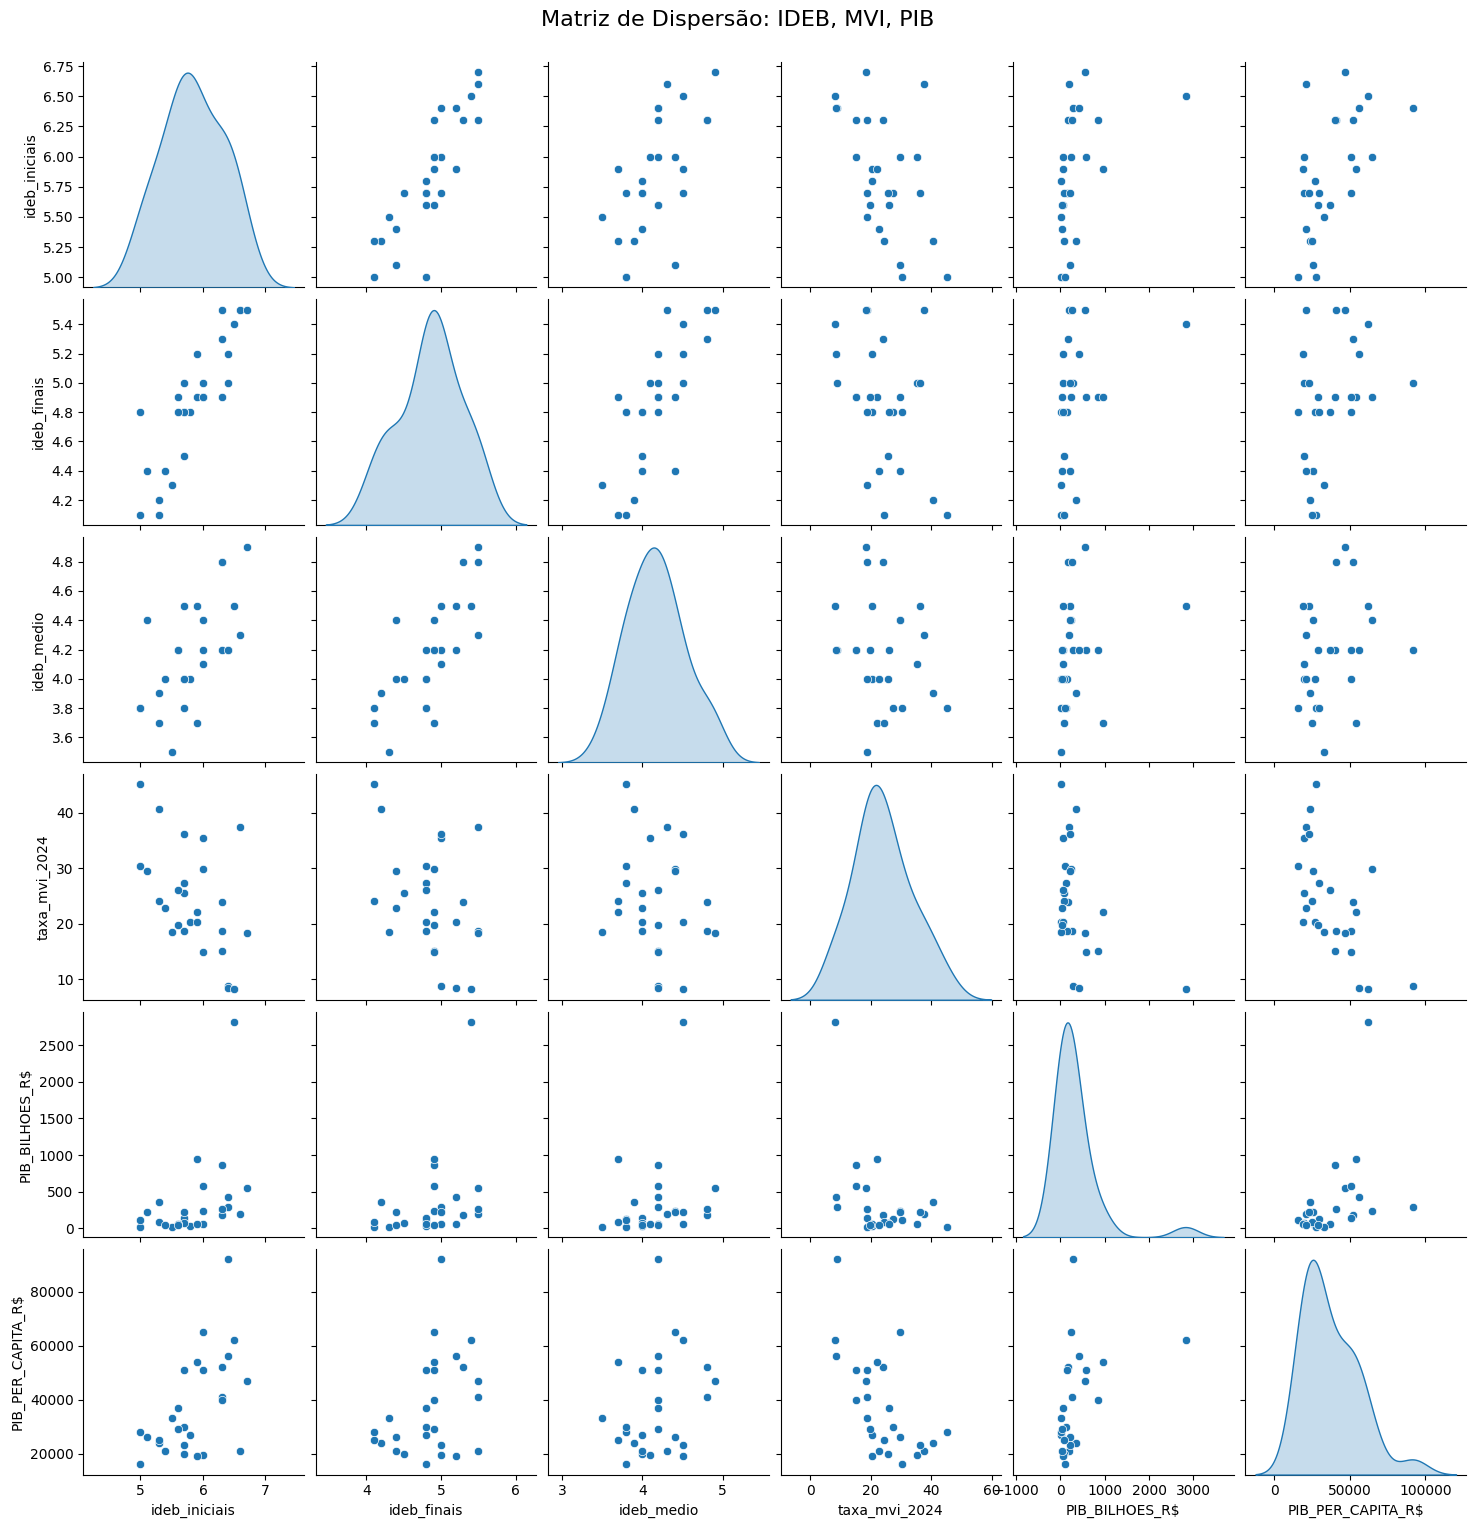

In [9]:


ax = sns.pairplot(numbers,  diag_kind='kde')

ax.fig.suptitle('Matriz de Dispersão: IDEB, MVI, PIB', y=1.02, fontsize=16)

plt.show();

### **Quartis** ###

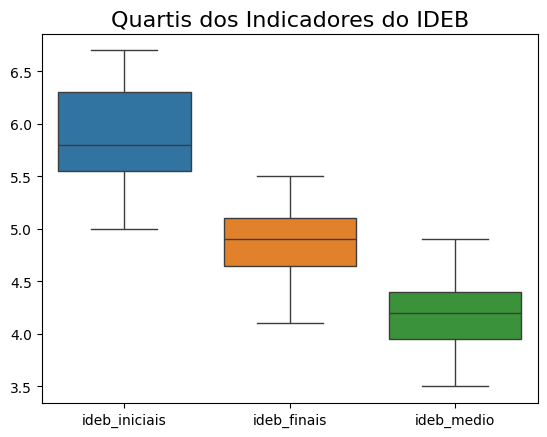

In [10]:
ax = sns.boxplot(numbers[['ideb_iniciais', 'ideb_finais', 'ideb_medio']])
ax.set_title('Quartis dos Indicadores do IDEB', fontsize=16);

>O Brasil consegue alfabetizar e manter uma base razoável (Anos Iniciais), mas perde força no final do fundamental e "enfrenta uma crise" no Ensino Médio. Estatisticamente, o sucesso da segurança pública que você viu nos outros gráficos depende dessa base (Iniciais), pois é ali que o desempenho é alto o suficiente para gerar impacto real.

### **Regressão Linear IDEB & MVI**

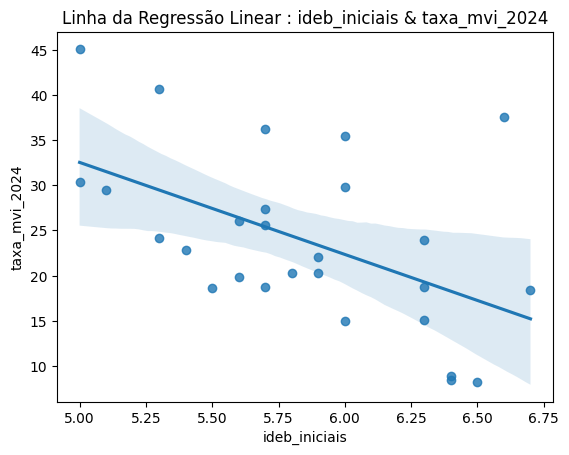

In [11]:
ax = sns.regplot(data = numbers, x='ideb_iniciais', y='taxa_mvi_2024')
ax.set_title('Linha da Regressão Linear : ideb_iniciais & taxa_mvi_2024');

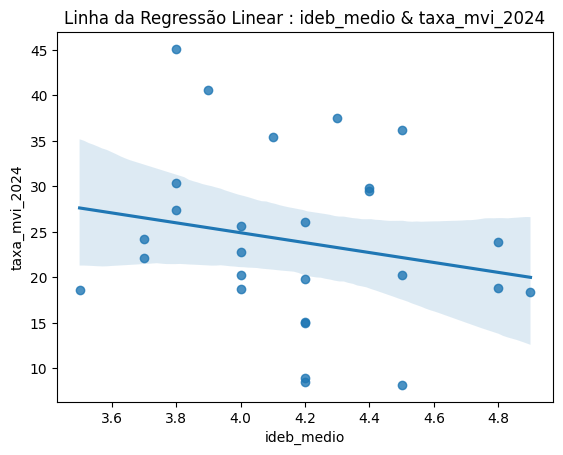

In [12]:
ax = sns.regplot(data = numbers, x='ideb_medio', y='taxa_mvi_2024')
ax.set_title('Linha da Regressão Linear : ideb_medio & taxa_mvi_2024');

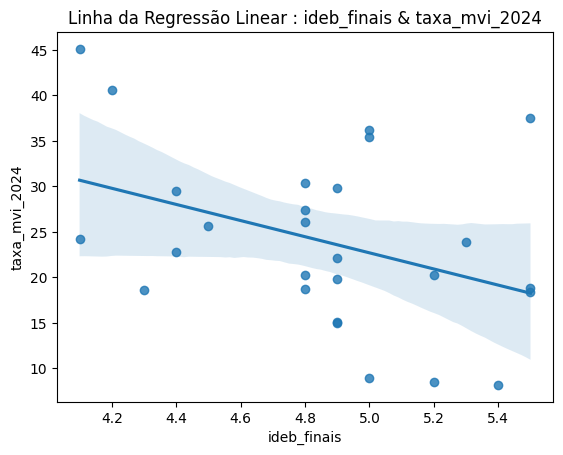

In [13]:
ax = sns.regplot(data = numbers, x='ideb_finais', y='taxa_mvi_2024')
ax.set_title('Linha da Regressão Linear : ideb_finais & taxa_mvi_2024');

### Análise de Correlação: Educação e Violência

A partir dos gráficos de regressão linear gerados, é possível identificar uma tendência clara e consistente: um melhor desempenho no IDEB (Índice de Desenvolvimento da Educação Básica) reflete diretamente na redução das taxas de MVI (Mortes Violentas Intencionais).

**Principais observações da análise:**

* **Direção da Correlação:** Em todas as etapas de ensino, a correlação é negativa, o que estatisticamente é o cenário desejado.
* **Força por Etapa de Ensino:** A correlação negativa apresenta-se mais robusta nos Anos Finais e Anos Iniciais do Ensino Fundamental.
* **Comportamento no Ensino Médio:** Observa-se uma variação maior dos dados e uma correlação negativa mais fraca, sugerindo a influência de outros fatores sociais nesta faixa etária.

### **PIP & PIB Percapita** ###

>**Quartis**

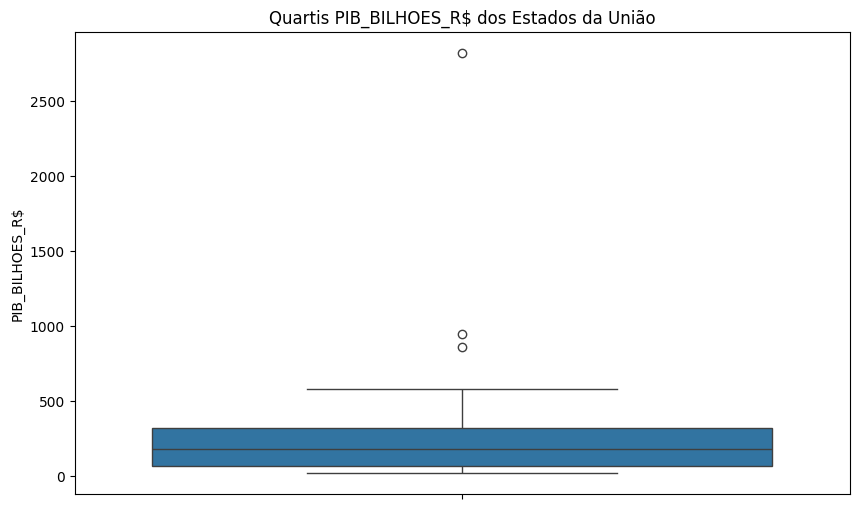

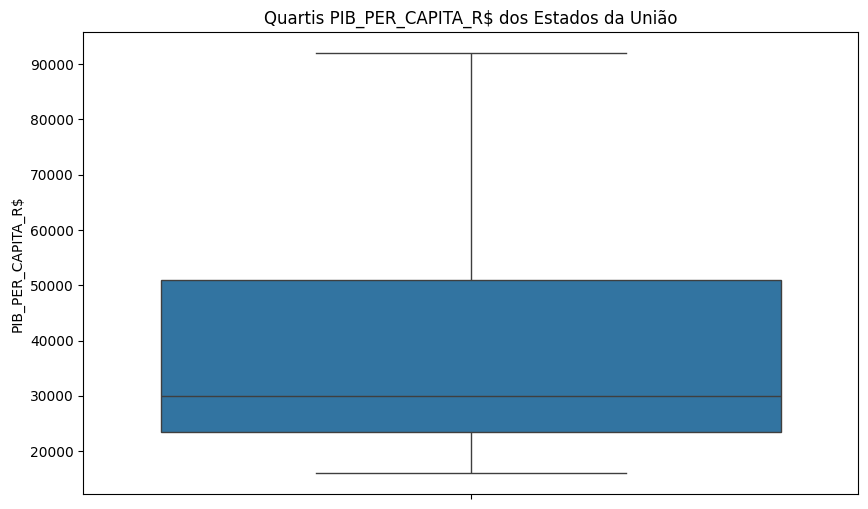

In [28]:
for col in ['PIB_BILHOES_R$', 'PIB_PER_CAPITA_R$']:
    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(y=numbers[col])
    ax.set_title(f'Quartis {col} dos Estados da União')
    plt.show()

🔍 **Análise do PIB por Estado**
* **Concentração na Base:** A maioria das unidades da federação está espremida nos 1º, 2º e 3º quartis, com valores abaixo de R$ 500 bilhões.
* **Disparidade Extrema:** São Paulo aparece como um *outlier* isolado e evidente, superando a marca de R$ 3 trilhões, o que ressalta a centralização da riqueza nacional.

🔍 **Análise do PIB Per Capita**
* **Desenvolvimento Intermediário:** O 3º quartil revela uma "classe média" de estados com PIB per capita entre R$ 30 mil e R$ 51 mil.
* **Gargalo na Base e Elite:** Metade dos estados (1º e 2º quartis) mal atinge os R$ 30 mil, enquanto os *outliers* de alta performance superam os R$ 90 mil, chegando ao topo com o Distrito Federal.

>**Regressão Linear PIB & PIB percapita com MVI**

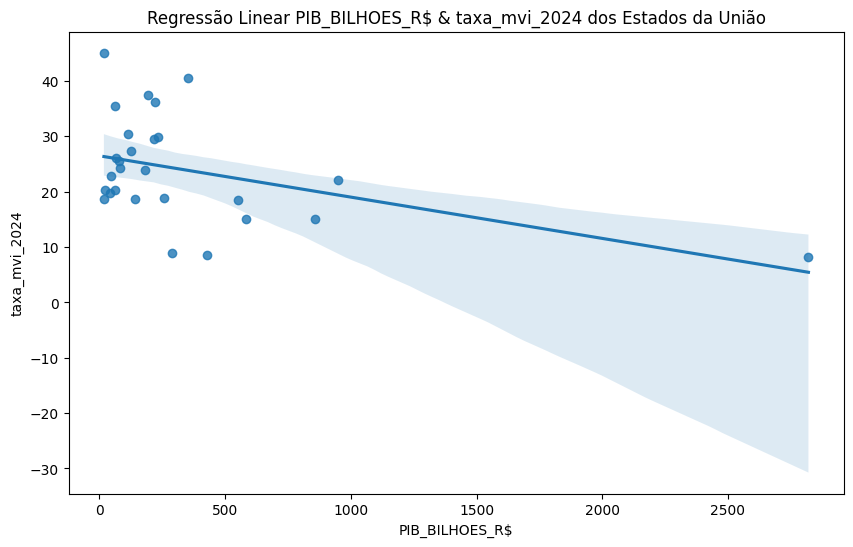

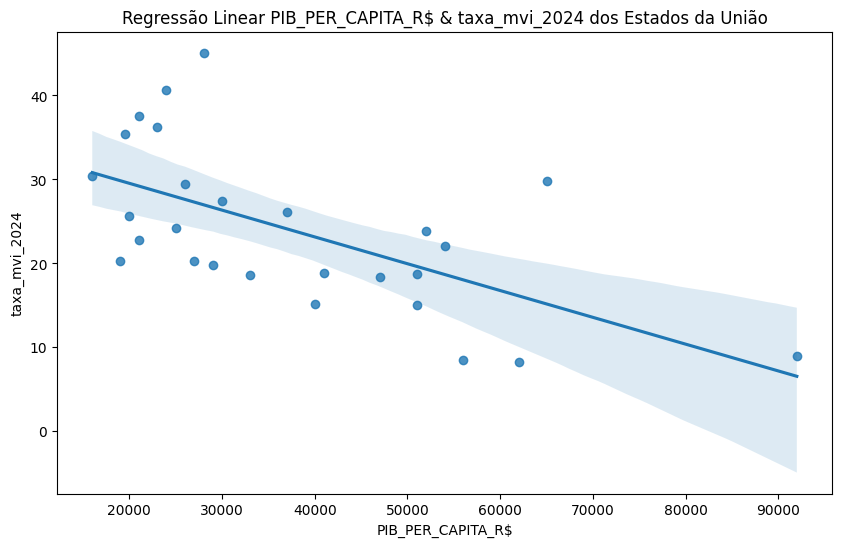

In [30]:
for col in ['PIB_BILHOES_R$', 'PIB_PER_CAPITA_R$']:
    plt.figure(figsize=(10, 6))
    ax = sns.regplot(data = numbers, x = numbers[col], y = 'taxa_mvi_2024')
    ax.set_title(f'Regressão Linear {col} & taxa_mvi_2024 dos Estados da União')
    plt.show()

🔍 **Análise de Regressão: Riqueza vs. Violência (MVI)**
* **Correlação Negativa:** Ambos os gráficos confirmam que o aumento do PIB e do PIB Per Capita está associado à redução das Mortes Violentas Intencionais (MVI).
* **Gargalo da Pobreza:** A maior concentração de altas taxas de violência ocorre em estados com PIB Per Capita abaixo de R$ 30 mil.
* **Tendência Clara:** Embora não seja uma correlação perfeita (R² < 1), a inclinação negativa da reta prova que o desenvolvimento econômico é um fator estatisticamente relevante na promoção da segurança pública.

### **Classificando as regiões dos estados** ###

In [31]:
region = {
    'AC': 'Norte', 'AM': 'Norte', 'AP': 'Norte', 'PA': 'Norte',
    'RO': 'Norte', 'RR': 'Norte', 'TO': 'Norte',
    'AL': 'Nordeste', 'BA': 'Nordeste', 'CE': 'Nordeste', 'MA': 'Nordeste',
    'PB': 'Nordeste', 'PE': 'Nordeste', 'PI': 'Nordeste', 'RN': 'Nordeste', 'SE': 'Nordeste',
    'DF': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'MS': 'Centro-Oeste', 'MT': 'Centro-Oeste',
    'ES': 'Sudeste', 'MG': 'Sudeste', 'RJ': 'Sudeste', 'SP': 'Sudeste',
    'PR': 'Sul', 'RS': 'Sul', 'SC': 'Sul'
}

df['Região'] = df['uf'].map(region)



### **MVI por região** ###

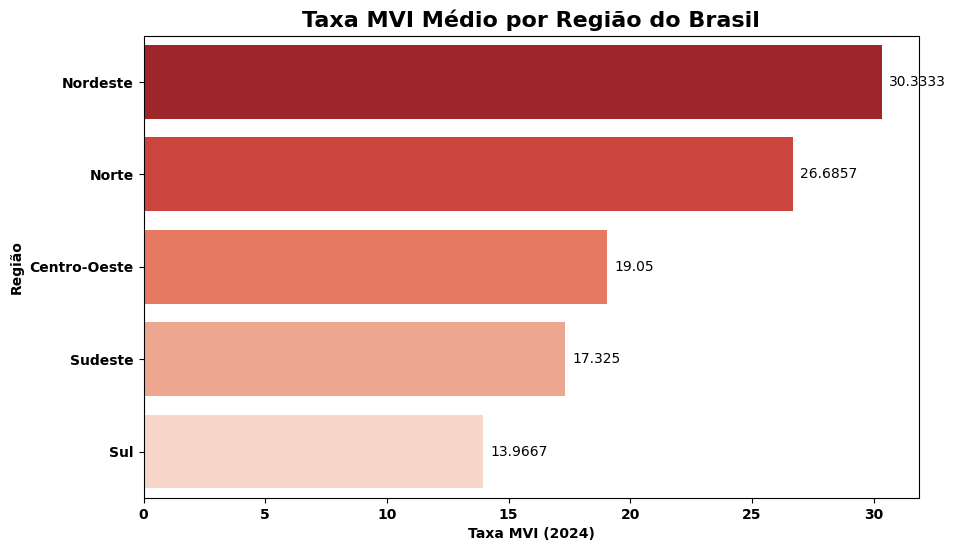

In [42]:
region_mvi = df.groupby('Região')['taxa_mvi_2024'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x = region_mvi.values,
    y = region_mvi.index,
    hue = region_mvi.index,
    palette = 'Reds_r',
    legend = False
)

for container in ax.containers:
    ax.bar_label(container, padding=5)

plt.title('Taxa MVI Médio por Região do Brasil', fontsize=16, fontweight='bold')
plt.xlabel('Taxa MVI (2024)', fontweight='bold')
plt.ylabel('Região', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

### **Criando as médias por região para cada ciclo do IDEB** ###


In [47]:
region_ideb_iniciais = df.groupby('Região')['ideb_iniciais'].mean().sort_values(ascending=False)
region_ideb_finais = df.groupby('Região')['ideb_finais'].mean().sort_values(ascending=False)
region_ideb_medio = df.groupby('Região')['ideb_medio'].mean().sort_values(ascending=False)



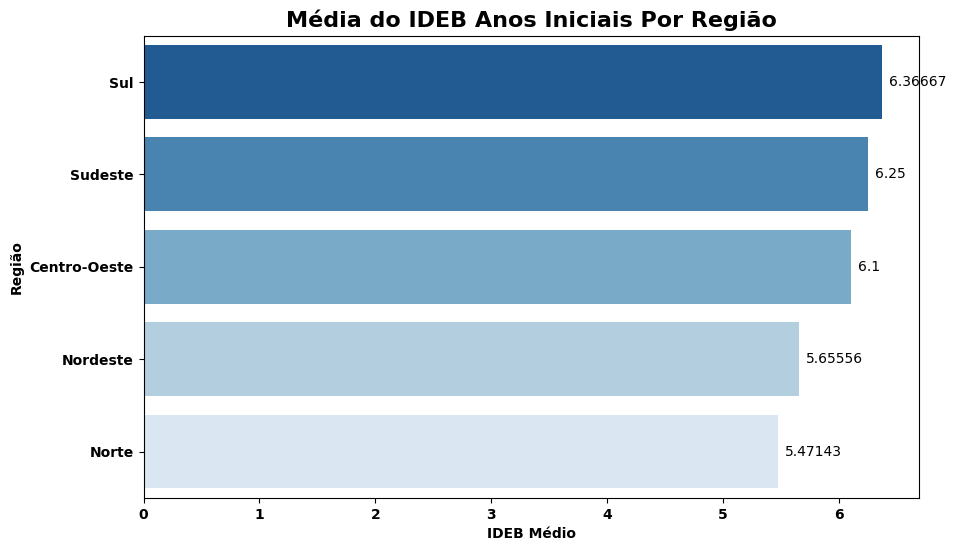

In [67]:

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x = region_ideb_iniciais.values,
    y = region_ideb_iniciais.index,
    hue = region_mvi.index,
    palette = 'Blues_r',
    legend = False
)

for container in ax.containers:
    ax.bar_label(container, padding=5)

plt.title('Média do IDEB Anos Iniciais Por Região', fontsize=16, fontweight='bold')
plt.xlabel('IDEB Médio', fontweight='bold')
plt.ylabel('Região', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

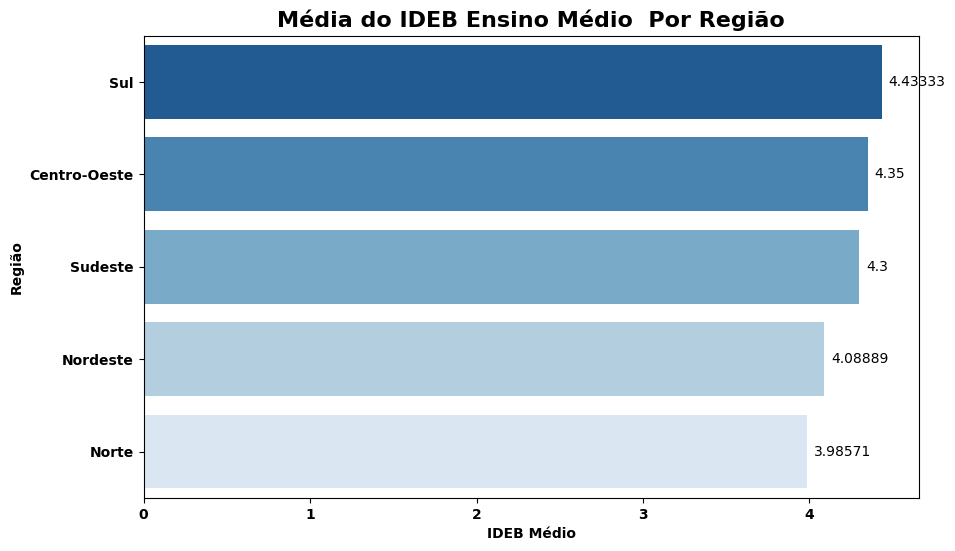

In [68]:

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x = region_ideb_medio.values,
    y = region_ideb_medio.index,
    hue = region_mvi.index,
    palette = 'Blues_r',
    legend = False
)

for container in ax.containers:
    ax.bar_label(container, padding=5)

plt.title('Média do IDEB Ensino Médio  Por Região', fontsize=16, fontweight='bold')
plt.xlabel('IDEB Médio', fontweight='bold')
plt.ylabel('Região', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

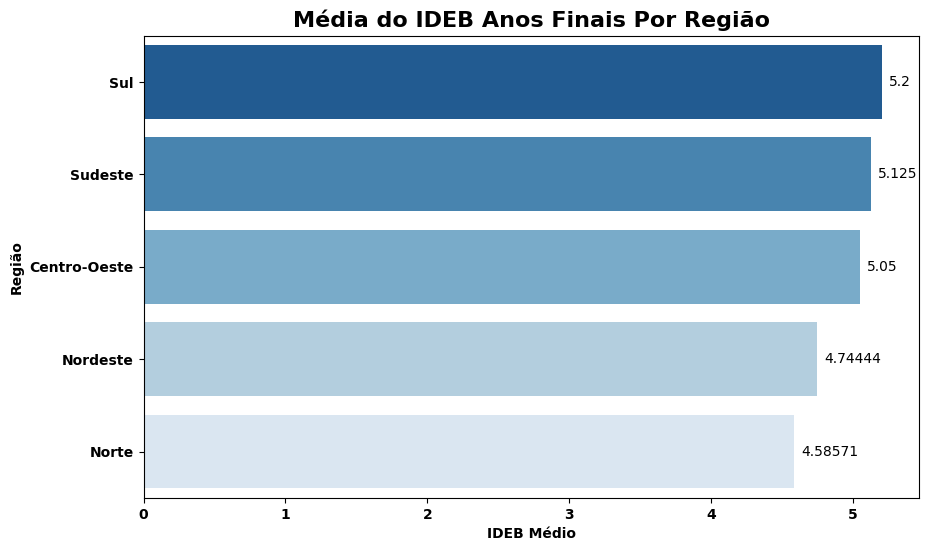

In [66]:

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x = region_ideb_finais.values,
    y = region_ideb_finais.index,
    hue = region_mvi.index,
    palette = 'Blues_r',
    legend = False
)

for container in ax.containers:
    ax.bar_label(container, padding=5)

plt.title('Média do IDEB Anos Finais Por Região', fontsize=16, fontweight='bold')
plt.xlabel('IDEB Médio', fontweight='bold')
plt.ylabel('Região', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

> **Análise do Desempenho Educacional por Região**

O **IDEB médio** é liderado pela região **Sul**, seguida pela **Sudeste**, mas ambas as regiões apresentam decréscimo no IDEB ao longo dos ciclos.

**Pontos observados:**

* **Liderança:** O Sul mantém os melhores índices em todos os níveis, mas a queda entre os Anos Iniciais e o Ensino Médio é nítida.
* **Tendência:** O Sudeste segue o mesmo padrão, confirmando que o declínio de desempenho é um desafio estrutural mesmo nas regiões mais ricas.

### **PIB por região** ###

In [76]:
region_pib_perca = df.groupby('Região')['PIB_PER_CAPITA_R$'].mean().sort_values(ascending=False)
region_pib = df.groupby('Região')['PIB_BILHOES_R$'].mean().sort_values(ascending=False)

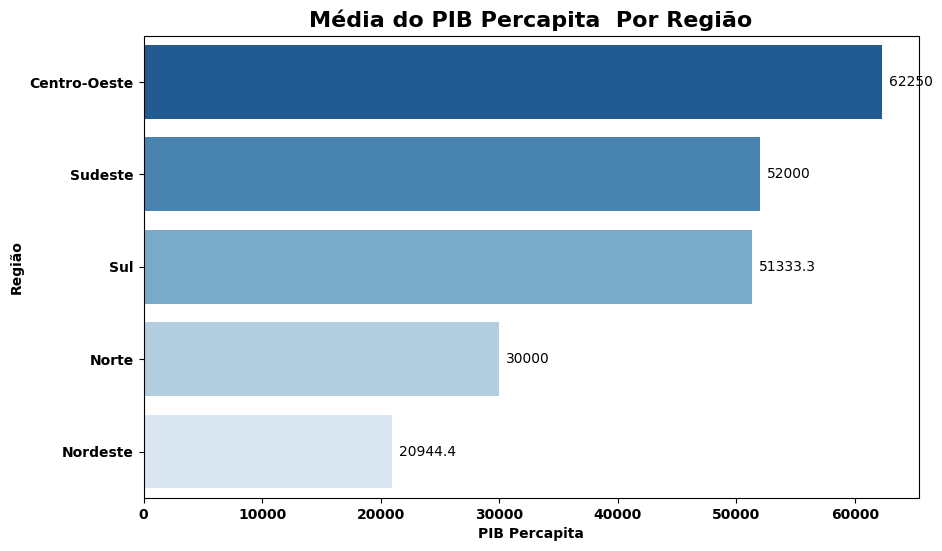

In [74]:

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x = region_pib_perca.values,
    y = region_pib_perca.index,
    hue = region_mvi.index,
    palette = 'Blues_r',
    legend = False
)

for container in ax.containers:
    ax.bar_label(container, padding=5)

plt.title('Média do PIB Percapita  Por Região', fontsize=16, fontweight='bold')
plt.xlabel('PIB Percapita', fontweight='bold')
plt.ylabel('Região', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

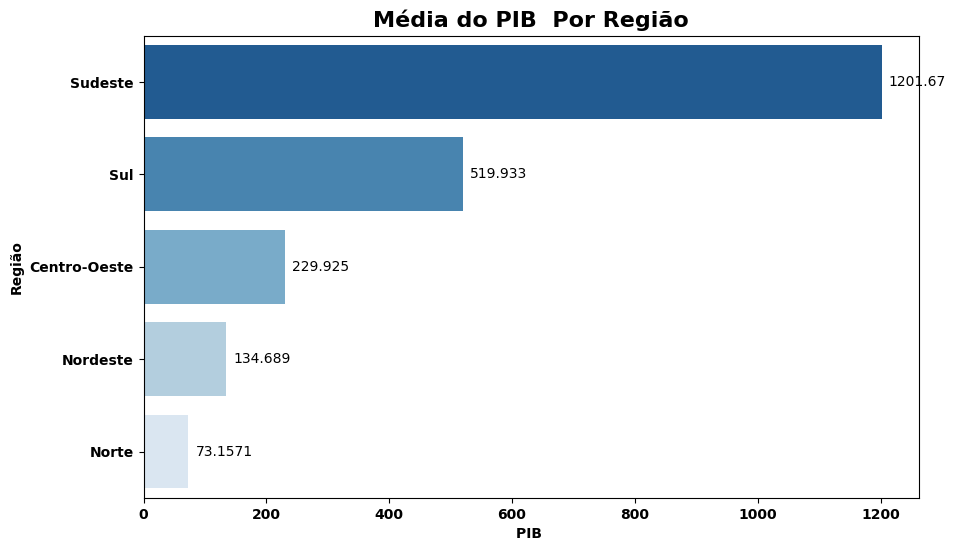

In [77]:

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x = region_pib.values,
    y = region_pib.index,
    hue = region_mvi.index,
    palette = 'Blues_r',
    legend = False
)

for container in ax.containers:
    ax.bar_label(container, padding=5)

plt.title('Média do PIB  Por Região', fontsize=16, fontweight='bold')
plt.xlabel('PIB ', fontweight='bold')
plt.ylabel('Região', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

A região **Sul** lidera com os melhores índices de **IDEB** e o menor **MVI** do país. O **Centro-Oeste** destaca-se pelo maior **PIB per capita** (R$ 62 mil), embora ocupe o 3º lugar em desempenho escolar. Já as regiões **Norte** e **Nordeste** enfrentam o cenário mais crítico, com baixo PIB e IDEB, registrando as maiores taxas de mortes violentas.

**Resumo dos Pontos Chave:**

* **Sul:** Referência em educação e segurança.
* **Centro-Oeste:** Líder em riqueza por pessoa, mas com educação intermediária.
* **Norte/Nordeste:** Forte correlação entre baixa renda, baixa escolaridade e alta violência.